In [1]:
#!pip install xgboost

## XGBOOST REGRESSION MODEL

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost offers many tools for Machine Learning, one of them is the Regression model, implemented in this notebook, whichs allows us to generate a prediction model, and gives light about what could be the main variables and their importance to make a prediction about the variable we chose as a representation of Quality of Life. The way the model works is by generating a decision tree from the train stage, and the use of this tree to perform a prediction with the test data or any data that has the features involved.

In [2]:
import pandas as pd
from sklearn.model_selection import  train_test_split, cross_val_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [3]:
df = pd.read_csv('../data/Datasets by Department/df_vars_modeling_dpto_final.csv')
df

,anio,codigo_departamento,codigo_entidad,promedio_del_componente_de_gestion_por_departamento_y_nacion,promedio_del_componente_de_resultados_por_departamento_y_nacion,participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),pib_per_capita,pib_per_capita_como_porcentaje_del_promedio_nacional,pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),...,hurtos_x_10000_hab,homicidios,homicidios_x_10000_hab,violencia_intrafamiliar,violencia_intrafamiliar_x_10000_hab,mdm,conectividad,transformacion,inversion_total,vacunacion_pentavalente_0_1_mean
0,2016,5,5000,0.535800,0.692200,14.200000,1.928453e+07,137.67000,7413.780000,2826.540000,...,12.871520,15.016000,4.406800,38.976000,6.016000,53.424320,27992171911,52829438440,80821610351,0.927392
1,2016,8,8000,0.436800,0.698500,4.580000,1.549513e+07,110.62000,375.660000,110.230000,...,9.304783,24.608696,0.940870,104.000000,3.972174,43.680435,8695209114,28774131776,37469340890,0.975304
2,2016,11,11001,0.412800,0.532400,1.800938,1.357851e+07,96.93375,1782.839375,1269.656563,...,43.060000,1278.000000,1.600000,4738.000000,5.940000,77.560000,4591990672,44654525711,49246516383,0.956000
3,2016,13,13000,0.388700,0.647800,2.140000,1.457045e+07,104.02000,1370.430000,704.020000,...,2.797609,8.934783,1.270217,18.239130,2.694348,38.773043,19951902097,27358797289,47310699386,0.790543
4,2016,15,15000,0.495300,0.676300,1.280000,1.852046e+07,132.21000,2639.780000,1694.060000,...,11.426911,0.869919,0.935528,25.642276,13.514228,49.328537,17516978034,6708924973,24225903007,0.886130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2019,91,91000,0.305530,0.636270,NaN,NaN,NaN,NaN,NaN,...,52.359497,4.000000,1.215633,67.000000,21.257215,30.873500,0,177484873,177484873,0.928500
128,2019,94,94000,0.480100,0.549040,NaN,NaN,NaN,NaN,NaN,...,65.191442,3.000000,0.918189,89.000000,27.239617,46.020164,534281300,7108304,541389604,1.000000
129,2019,95,95000,0.503210,0.592438,NaN,NaN,NaN,NaN,NaN,...,17.101595,8.500000,4.593769,37.250000,10.793312,50.933432,534281300,762671702,1296953002,0.907500
130,2019,97,97000,0.496997,0.525490,NaN,NaN,NaN,NaN,NaN,...,11.340422,1.333333,1.410219,30.333333,27.290174,45.854152,534281300,171584563,705865863,0.731333


In [4]:
y = df.promedio_del_componente_de_resultados_por_departamento_y_nacion
x = df.drop(['promedio_del_componente_de_resultados_por_departamento_y_nacion', 'codigo_departamento', 'codigo_entidad'], axis=1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [6]:
xgbr = XGBRegressor(verbosity=0)


In [7]:
xgbr.fit(x_train, y_train)
score = xgbr.score(x_train, y_train)
print("Score: ", score)

Score:  0.9999341089776052


In [21]:
cv_score = cross_val_score(xgbr, x_train, y_train, cv=10)
print("Cross Validation Score: ", cv_score.mean())

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.2

Cross Validation Score:  0.7447607581367545


C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)


In [9]:
y_pred = xgbr.predict(x_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

MSE:  0.0014777945907294952
RMSE:  0.0384420939951181


In [11]:
len(x.columns)

91

Features that have a non-zero importance in the model.

In [13]:
print(len(xgbr.get_booster().get_score(importance_type='weight')))
xgbr.get_booster().get_score(importance_type='weight')

75


{'poblacion_rural': 6,
 'pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca)': 5,
 'cobertura_bruta_en_educacion_primaria': 4,
 'participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio)': 7,
 'cobertura_media_neta': 4,
 'porcentaje_de_poblacion_de_hombres_de__25-29': 2,
 'recursos_del_balance_y_variacion_de_depositos': 4,
 'cobertura_bruta_en_educacion_-_total': 10,
 'cobertura_electrica_rural': 15,
 'cobertura_bruta_en_educacion_media': 3,
 'promedio_del_componente_de_gestion_por_departamento_y_nacion': 16,
 'porcentaje_de_n

All the normalize importance (weights) of each feature in the model, the ones with a value of 0, did not appear in the previous list.

In [14]:
print(len(xgbr.feature_importances_))
xgbr.feature_importances_

91


array([9.8146476e-05, 3.1580601e-03, 1.2034761e-03, 1.1081779e-03,
       4.9065556e-03, 5.0508220e-02, 6.4474693e-04, 1.7809433e-04,
       3.0498031e-05, 4.0024854e-04, 2.3197941e-04, 0.0000000e+00,
       6.0703175e-04, 8.3375729e-05, 4.5337566e-04, 9.9071272e-05,
       2.8763534e-04, 2.4244307e-04, 0.0000000e+00, 3.6055960e-02,
       2.1647038e-03, 1.7492717e-02, 5.1345383e-03, 2.1487002e-05,
       0.0000000e+00, 4.3636192e-02, 3.1414088e-03, 2.3731733e-04,
       1.3708143e-03, 2.4125777e-04, 2.7106320e-05, 8.5246866e-04,
       1.5840651e-05, 7.6607153e-05, 0.0000000e+00, 8.9554124e-02,
       2.9344724e-03, 1.4169222e-05, 1.6780121e-05, 9.5297197e-05,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.1278249e-05,
       0.0000000e+00, 3.9649105e-05, 1.7516852e-04, 2.4102844e-04,
       2.6935037e-05, 0.0000000e+00, 0.0000000e+00, 1.0798067e-04,
       1.2159953e-04, 3.1430530e-04, 2.3688178e-03, 1.8061030e-05,
       1.6241575e-02, 4.4985477e-02, 2.5971213e-03, 5.2838910e

From the results above, one can see that most of the variables with relevance for the model correspond to economic and social variables different from MINTIC investment.

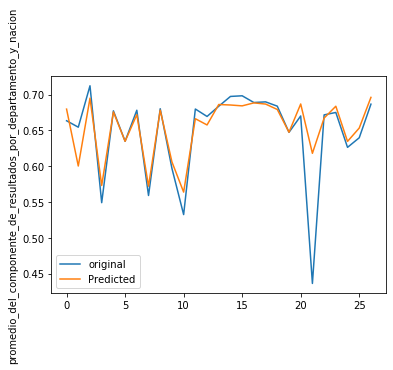

In [20]:
x_ax = range(len(y_test))
sns.lineplot(x_ax, y_test, label ='original')
sns.lineplot(x_ax, y_pred, label ='Predicted')
plt.ylabel('promedio_del_componente_de_resultados_por_departamento_y_nacion')
plt.legend()
plt.show()

The plot above shows the performance of the model with the test data, and one can notice that it follows the overall trend of the test labels.

In [16]:
from xgboost import plot_tree
import matplotlib


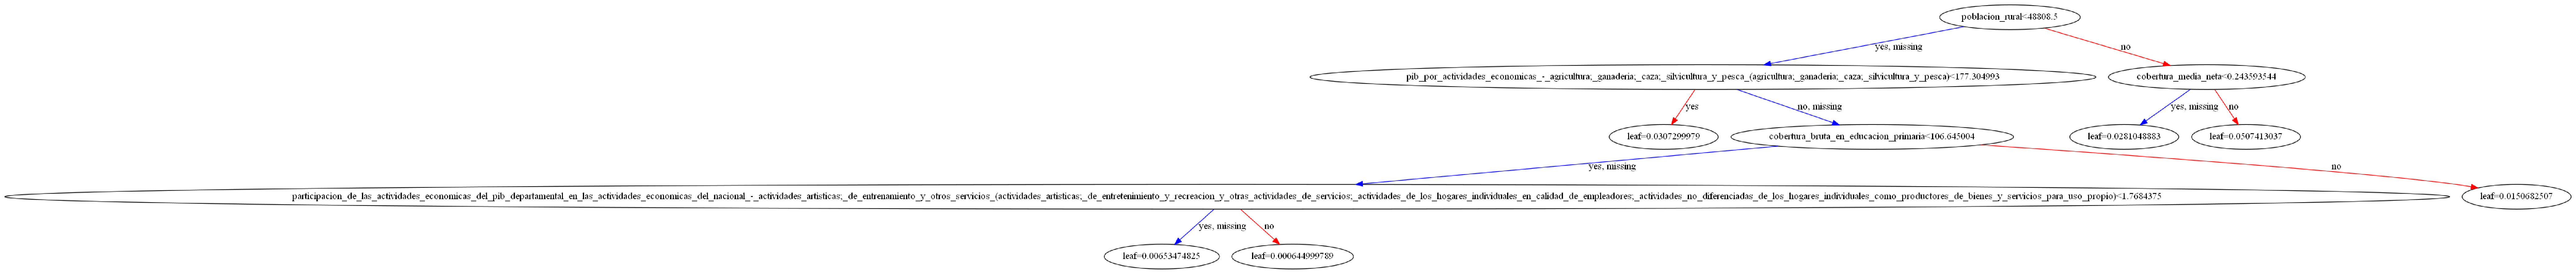

In [17]:
#Double Click on the image to see it bigger.
plot_tree(xgbr)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')